In [ ]:
!pip install fastparquet

In [ ]:
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import joblib
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_parquet('/content/yellow_tripdata_2025-01.parquet', engine='fastparquet')

In [ ]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2025-01-01 00:18:38,2025-01-01 00:26:59,1.0,1.60,1.0,N,229,237,1,10.0,3.5,0.5,3.00,0.0,1.0,18.00,2.5,0.0
1,1,2025-01-01 00:32:40,2025-01-01 00:35:13,1.0,0.50,1.0,N,236,237,1,5.1,3.5,0.5,2.02,0.0,1.0,12.12,2.5,0.0
2,1,2025-01-01 00:44:04,2025-01-01 00:46:01,1.0,0.60,1.0,N,141,141,1,5.1,3.5,0.5,2.00,0.0,1.0,12.10,2.5,0.0
3,2,2025-01-01 00:14:27,2025-01-01 00:20:01,3.0,0.52,1.0,N,244,244,2,7.2,1.0,0.5,0.00,0.0,1.0,9.70,0.0,0.0
4,2,2025-01-01 00:21:34,2025-01-01 00:25:06,3.0,0.66,1.0,N,244,116,2,5.8,1.0,0.5,0.00,0.0,1.0,8.30,0.0,0.0


In [ ]:
print(f"Dataset shape: {df.shape}")

Dataset shape: (3475226, 19)


In [ ]:
print(df.dtypes)

VendorID                          int32
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int32
DOLocationID                      int32
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
Airport_fee                     float64
dtype: object


In [ ]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          540149
trip_distance                 0
RatecodeID               540149
store_and_fwd_flag       540149
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge     540149
Airport_fee              540149
dtype: int64


In [ ]:
print(df.describe())

           VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  3.475226e+06                     3475226                     3475226   
mean   1.785428e+00  2025-01-17 11:02:55.910964  2025-01-17 11:17:56.997901   
min    1.000000e+00         2024-12-31 20:47:55         2024-12-18 07:52:40   
25%    2.000000e+00         2025-01-10 07:59:01  2025-01-10 08:15:29.500000   
50%    2.000000e+00         2025-01-17 15:41:33         2025-01-17 15:59:34   
75%    2.000000e+00         2025-01-24 19:34:06         2025-01-24 19:48:31   
max    7.000000e+00         2025-02-01 00:00:44         2025-02-01 23:44:11   
std    4.263282e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     2.935077e+06   3.475226e+06  2.935077e+06  3.475226e+06   
mean      1.297859e+00   5.855126e+00  2.482535e+00  1.651916e+02   
min       0.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.

In [ ]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [ ]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2025-01-01 00:18:38,2025-01-01 00:26:59,1.0,1.60,1.0,N,229,237,1,10.0,3.5,0.5,3.00,0.0,1.0,18.00,2.5,0.0
1,1,2025-01-01 00:32:40,2025-01-01 00:35:13,1.0,0.50,1.0,N,236,237,1,5.1,3.5,0.5,2.02,0.0,1.0,12.12,2.5,0.0
2,1,2025-01-01 00:44:04,2025-01-01 00:46:01,1.0,0.60,1.0,N,141,141,1,5.1,3.5,0.5,2.00,0.0,1.0,12.10,2.5,0.0
3,2,2025-01-01 00:14:27,2025-01-01 00:20:01,3.0,0.52,1.0,N,244,244,2,7.2,1.0,0.5,0.00,0.0,1.0,9.70,0.0,0.0
4,2,2025-01-01 00:21:34,2025-01-01 00:25:06,3.0,0.66,1.0,N,244,116,2,5.8,1.0,0.5,0.00,0.0,1.0,8.30,0.0,0.0


In [ ]:
print(f"Pickup time range: {df['tpep_pickup_datetime'].min()} to {df['tpep_pickup_datetime'].max()}")
print(f"Dropoff time range: {df['tpep_dropoff_datetime'].min()} to {df['tpep_dropoff_datetime'].max()}")

Pickup time range: 2024-12-31 20:47:55 to 2025-02-01 00:00:44
Dropoff time range: 2024-12-18 07:52:40 to 2025-02-01 23:44:11


In [ ]:
invalid_trips = df[df['tpep_dropoff_datetime'] < df['tpep_pickup_datetime']]
if not invalid_trips.empty:
    df = df.drop(invalid_trips.index)

### Handline missing values

In [ ]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if pd.api.types.is_numeric_dtype(df[col]):
            df[col] = df[col].fillna(df[col].median())
        else:
            df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2025-01-01 00:18:38,2025-01-01 00:26:59,1.0,1.60,1.0,N,229,237,1,10.0,3.5,0.5,3.00,0.0,1.0,18.00,2.5,0.0
1,1,2025-01-01 00:32:40,2025-01-01 00:35:13,1.0,0.50,1.0,N,236,237,1,5.1,3.5,0.5,2.02,0.0,1.0,12.12,2.5,0.0
2,1,2025-01-01 00:44:04,2025-01-01 00:46:01,1.0,0.60,1.0,N,141,141,1,5.1,3.5,0.5,2.00,0.0,1.0,12.10,2.5,0.0
3,2,2025-01-01 00:14:27,2025-01-01 00:20:01,3.0,0.52,1.0,N,244,244,2,7.2,1.0,0.5,0.00,0.0,1.0,9.70,0.0,0.0
4,2,2025-01-01 00:21:34,2025-01-01 00:25:06,3.0,0.66,1.0,N,244,116,2,5.8,1.0,0.5,0.00,0.0,1.0,8.30,0.0,0.0


In [ ]:
df = df[(df['trip_distance'] > 0) & (df['trip_distance'] < 100) &
        (df['fare_amount'] > 0) & (df['total_amount'] > 0)]

In [ ]:
df['trip_duration_minutes'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

In [ ]:
df = df[(df['trip_duration_minutes'] >= 1) & (df['trip_duration_minutes'] <= 180)]

In [ ]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,trip_duration_minutes
0,1,2025-01-01 00:18:38,2025-01-01 00:26:59,1.0,1.60,1.0,N,229,237,1,10.0,3.5,0.5,3.00,0.0,1.0,18.00,2.5,0.0,8.350000
1,1,2025-01-01 00:32:40,2025-01-01 00:35:13,1.0,0.50,1.0,N,236,237,1,5.1,3.5,0.5,2.02,0.0,1.0,12.12,2.5,0.0,2.550000
2,1,2025-01-01 00:44:04,2025-01-01 00:46:01,1.0,0.60,1.0,N,141,141,1,5.1,3.5,0.5,2.00,0.0,1.0,12.10,2.5,0.0,1.950000
3,2,2025-01-01 00:14:27,2025-01-01 00:20:01,3.0,0.52,1.0,N,244,244,2,7.2,1.0,0.5,0.00,0.0,1.0,9.70,0.0,0.0,5.566667
4,2,2025-01-01 00:21:34,2025-01-01 00:25:06,3.0,0.66,1.0,N,244,116,2,5.8,1.0,0.5,0.00,0.0,1.0,8.30,0.0,0.0,3.533333


### Extracting temporal features to capture patterns



In [ ]:
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day'] = df['tpep_pickup_datetime'].dt.day
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month
df['pickup_year'] = df['tpep_pickup_datetime'].dt.year
df['pickup_weekday'] = df['tpep_pickup_datetime'].dt.weekday
df['pickup_is_weekend'] = df['pickup_weekday'].isin([5, 6]).astype(int)

In [ ]:
df['time_category'] = pd.cut(
    df['pickup_hour'],
    bins=[0, 6, 12, 18, 24],
    labels=['Night (0-6)', 'Morning (6-12)', 'Afternoon (12-18)', 'Evening (18-24)'],
    include_lowest=True
)

### Adding cyclical encoding for time features to capture periodicity


In [ ]:
df['hour_sin'] = np.sin(2 * np.pi * df['pickup_hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['pickup_hour'] / 24)
df['weekday_sin'] = np.sin(2 * np.pi * df['pickup_weekday'] / 7)
df['weekday_cos'] = np.cos(2 * np.pi * df['pickup_weekday'] / 7)

In [ ]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,pickup_day,pickup_month,pickup_year,pickup_weekday,pickup_is_weekend,time_category,hour_sin,hour_cos,weekday_sin,weekday_cos
0,1,2025-01-01 00:18:38,2025-01-01 00:26:59,1.0,1.60,1.0,N,229,237,1,...,1,1,2025,2,0,Night (0-6),0.0,1.0,0.974928,-0.222521
1,1,2025-01-01 00:32:40,2025-01-01 00:35:13,1.0,0.50,1.0,N,236,237,1,...,1,1,2025,2,0,Night (0-6),0.0,1.0,0.974928,-0.222521
2,1,2025-01-01 00:44:04,2025-01-01 00:46:01,1.0,0.60,1.0,N,141,141,1,...,1,1,2025,2,0,Night (0-6),0.0,1.0,0.974928,-0.222521
3,2,2025-01-01 00:14:27,2025-01-01 00:20:01,3.0,0.52,1.0,N,244,244,2,...,1,1,2025,2,0,Night (0-6),0.0,1.0,0.974928,-0.222521
4,2,2025-01-01 00:21:34,2025-01-01 00:25:06,3.0,0.66,1.0,N,244,116,2,...,1,1,2025,2,0,Night (0-6),0.0,1.0,0.974928,-0.222521


### Creating demand dataset by counting trips per location per hour

In [ ]:
df['pickup_hour_rounded'] = df['tpep_pickup_datetime'].dt.floor('H')
demand_df = df.groupby(['PULocationID', 'pickup_hour_rounded']).size().reset_index(name='demand')
demand_df.sort_values(['PULocationID', 'pickup_hour_rounded'], inplace=True)

<ipython-input-49-0a66bffc6619>:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['pickup_hour_rounded'] = df['tpep_pickup_datetime'].dt.floor('H')


In [ ]:
demand_df.head()

,PULocationID,pickup_hour_rounded,demand
0,1,2025-01-01 13:00:00,1
1,1,2025-01-01 14:00:00,1
2,1,2025-01-02 16:00:00,1
3,1,2025-01-02 20:00:00,1
4,1,2025-01-03 12:00:00,1


### EDA (Exploratory data analysis)

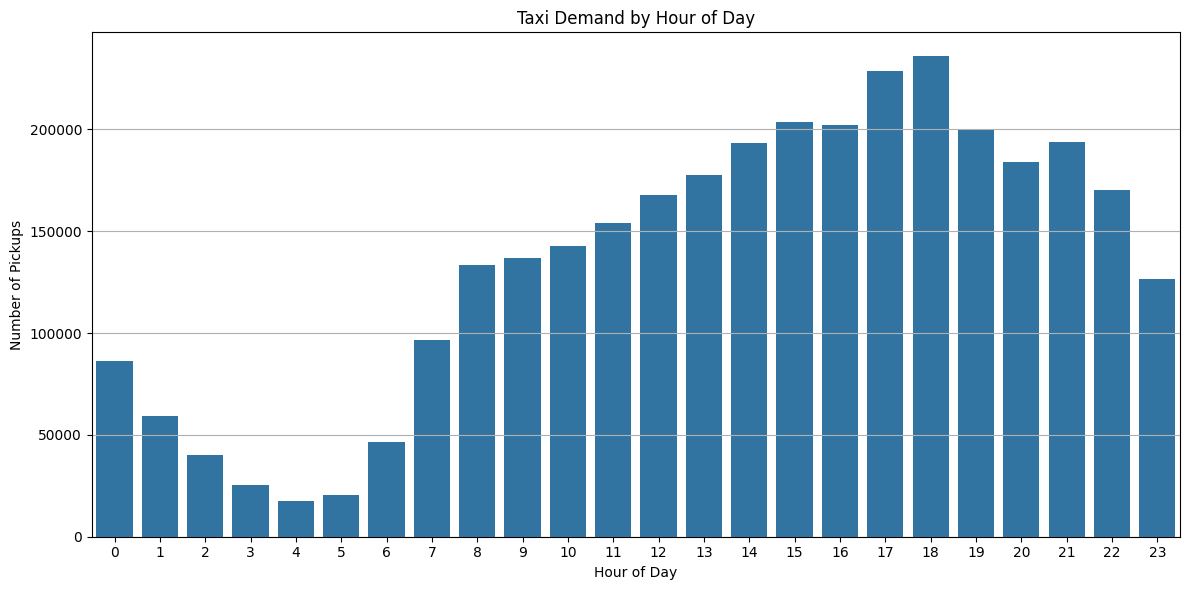

In [ ]:
# Hourly demand patterns

hourly_demand = df.groupby('pickup_hour').size()
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_demand.index, y=hourly_demand.values)
plt.title('Taxi Demand by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24))
plt.grid(axis='y')
plt.tight_layout()
plt.show()

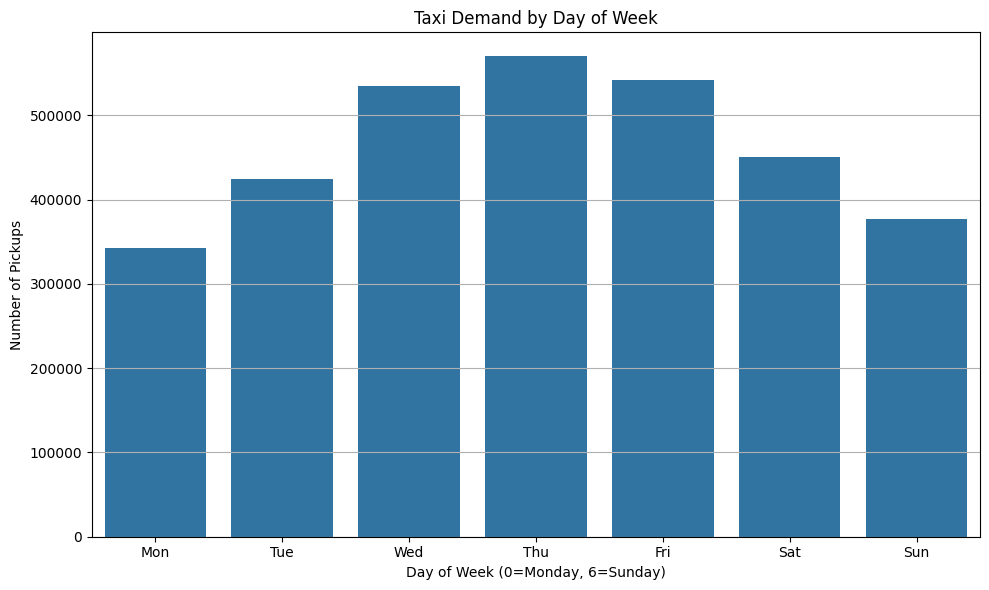

In [ ]:
# Daily demand patterns

daily_demand = df.groupby('pickup_weekday').size()
plt.figure(figsize=(10, 6))
sns.barplot(x=daily_demand.index, y=daily_demand.values)
plt.title('Taxi Demand by Day of Week')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Number of Pickups')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

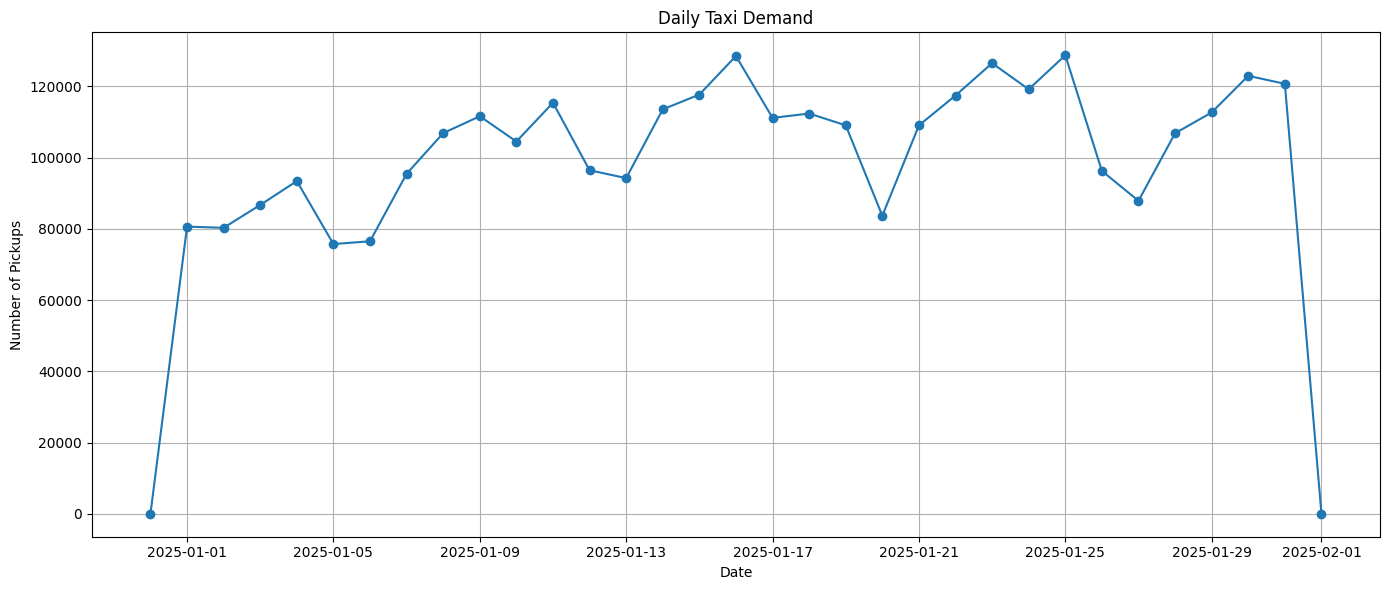

In [ ]:
# Demand over month

day_demand = df.groupby(df['tpep_pickup_datetime'].dt.date).size()
plt.figure(figsize=(14, 6))
plt.plot(day_demand.index, day_demand.values, marker='o')
plt.title('Daily Taxi Demand')
plt.xlabel('Date')
plt.ylabel('Number of Pickups')
plt.grid(True)
plt.tight_layout()
plt.show()

### Taking look at some spatial patterns

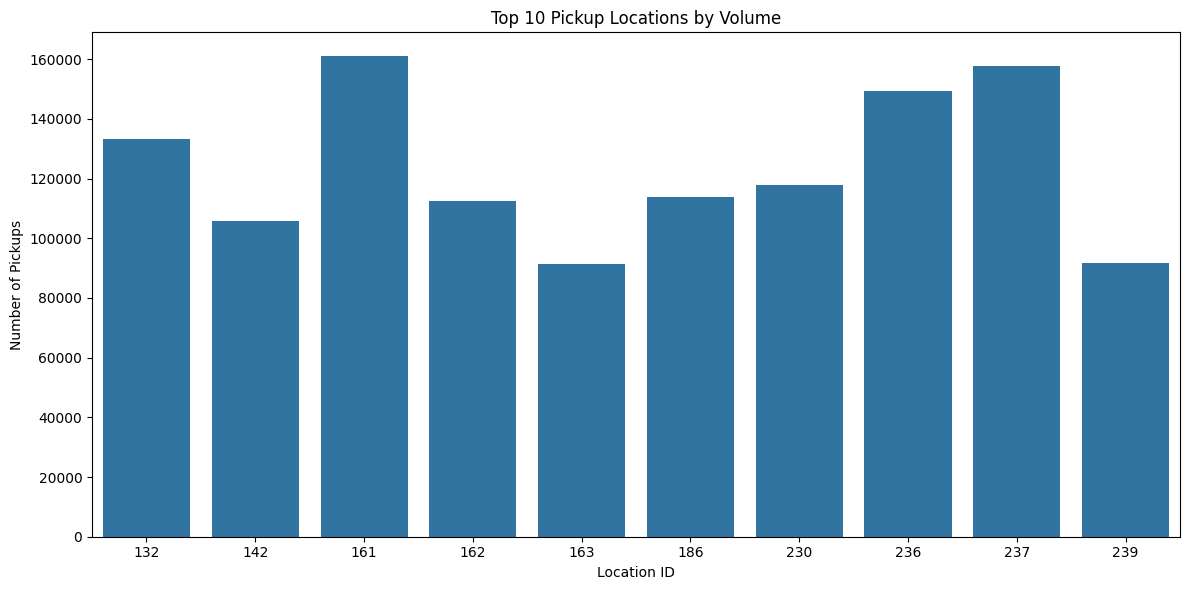

In [ ]:
# Top pickup spots/locations
top_pickup_locations = df['PULocationID'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_pickup_locations.index, y=top_pickup_locations.values)
plt.title('Top 10 Pickup Locations by Volume')
plt.xlabel('Location ID')
plt.ylabel('Number of Pickups')
plt.tight_layout()
plt.show()

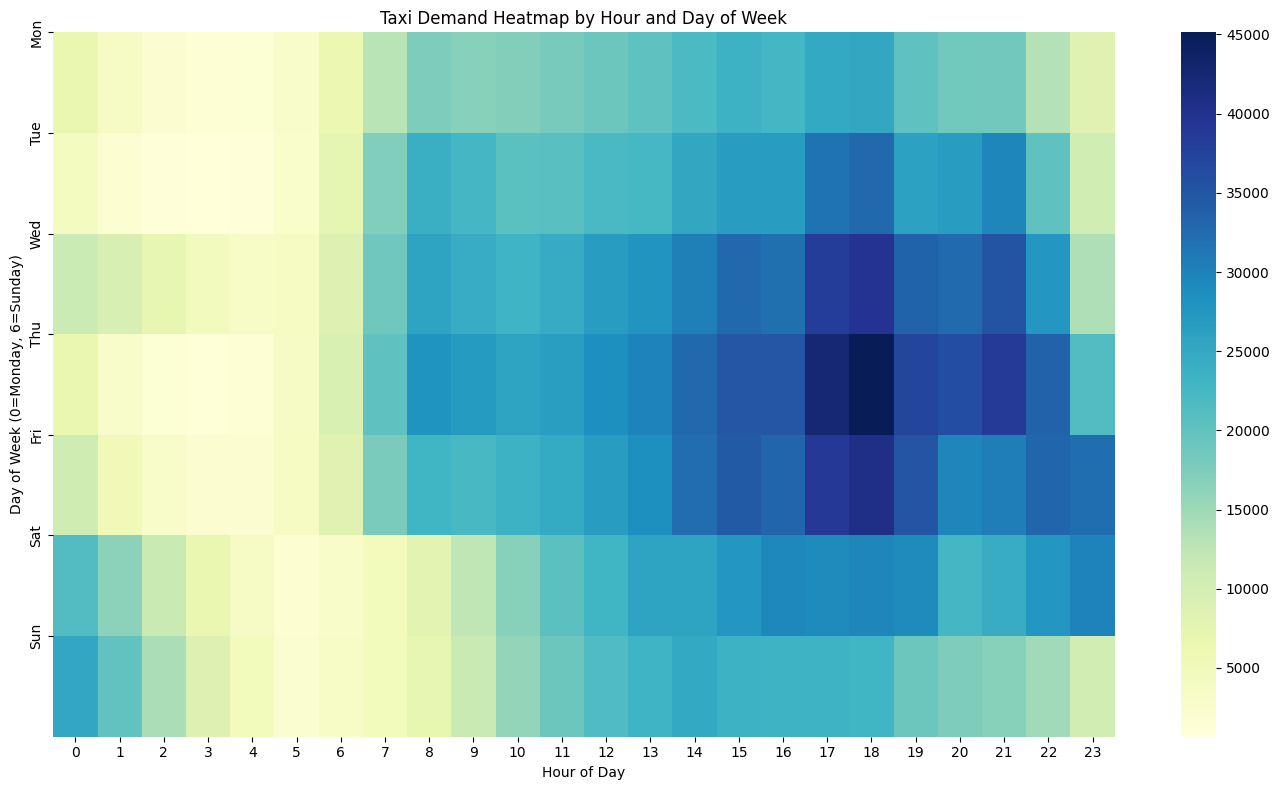

In [ ]:
# Using a heatmap to depict hourly and weekday demand

demand_heatmap = df.groupby(['pickup_weekday', 'pickup_hour']).size().unstack()
plt.figure(figsize=(14, 8))
sns.heatmap(demand_heatmap, cmap='YlGnBu', annot=False)
plt.title('Taxi Demand Heatmap by Hour and Day of Week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week (0=Monday, 6=Sunday)')
plt.yticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.tight_layout()
plt.show()

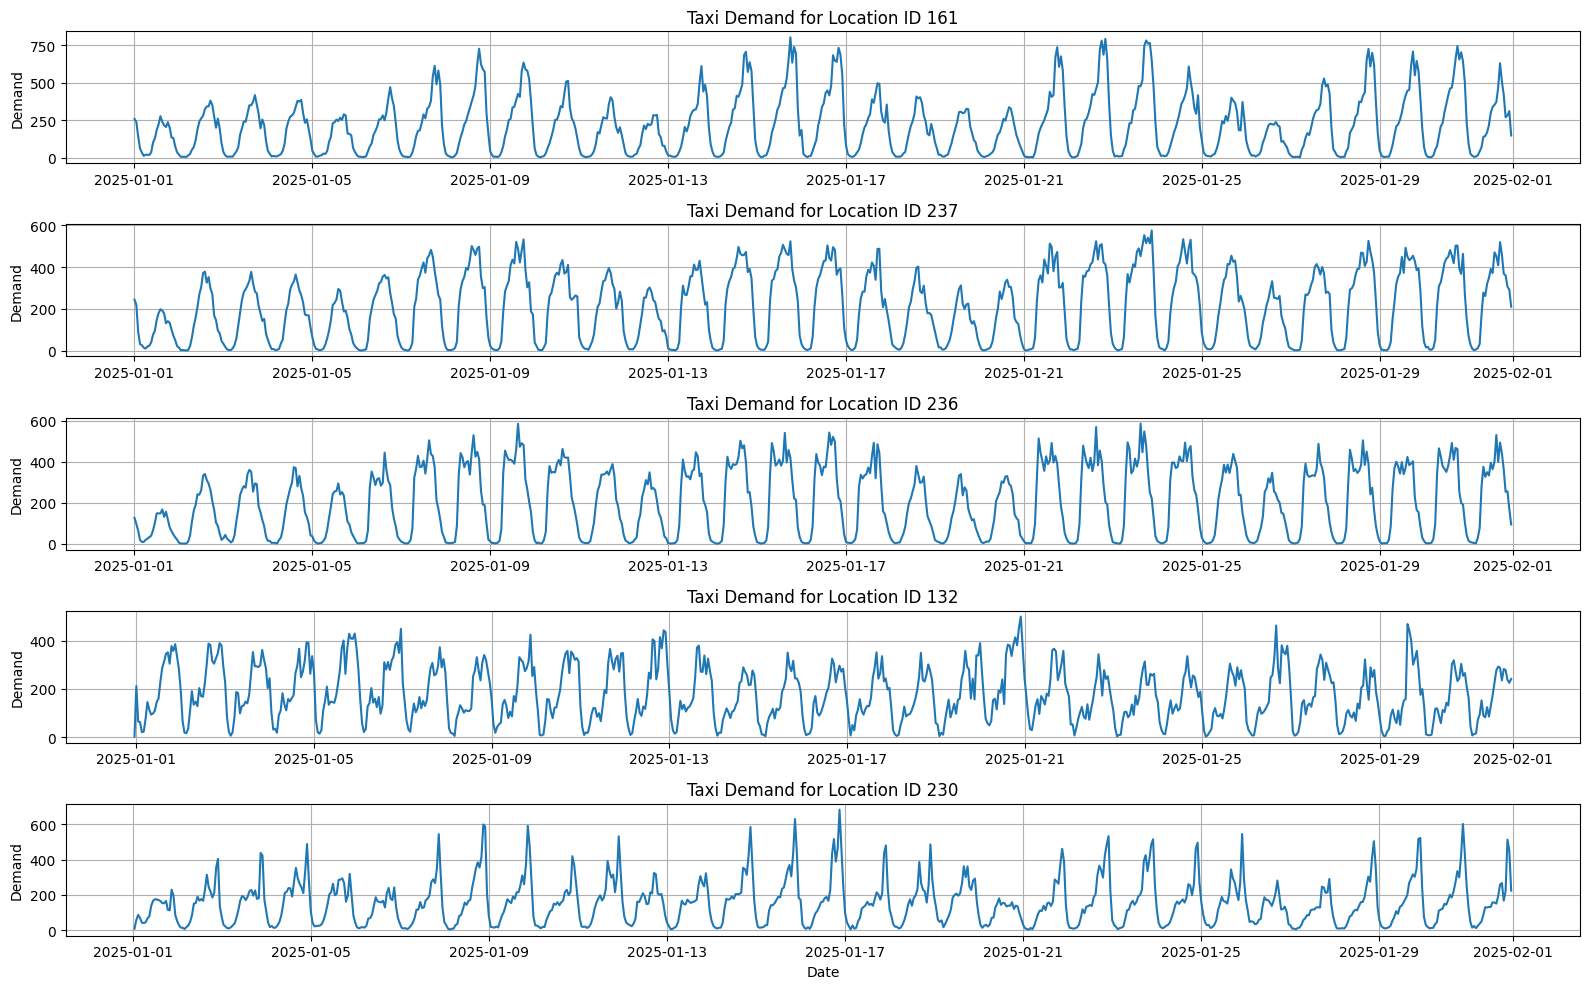

In [ ]:
# Visualizing time seies for top 5 busiest locations

top_locations = df['PULocationID'].value_counts().nlargest(5).index

plt.figure(figsize=(16, 10))
for i, location in enumerate(top_locations, 1):
    location_demand = demand_df[demand_df['PULocationID'] == location]
    plt.subplot(5, 1, i)
    plt.plot(location_demand['pickup_hour_rounded'], location_demand['demand'])
    plt.title(f'Taxi Demand for Location ID {location}')
    plt.ylabel('Demand')
    if i == 5:
        plt.xlabel('Date')
    plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Creating lag features meaning adding past demand values as predictors

def create_lag_features(df, group_col, time_col, target_col, lag_hours=[1, 2, 3, 24, 48, 168]):
    result_df = df.copy()
    result_df = result_df.sort_values([group_col, time_col])

    for lag in lag_hours:
        result_df[f'lag_{lag}h'] = result_df.groupby(group_col)[target_col].shift(lag)

    return result_df

In [ ]:
demand_with_lags = create_lag_features(
    demand_df,
    group_col='PULocationID',
    time_col='pickup_hour_rounded',
    target_col='demand'
)

In [ ]:
demand_with_lags = demand_with_lags.dropna()

In [ ]:
# Adding rolling window stats like moving average and standard deviation

def add_rolling_features(df, group_col, target_col, windows=[3, 6, 12, 24]):
    result_df = df.copy()

    for window in windows:
        result_df[f'rolling_mean_{window}h'] = result_df.groupby(group_col)[target_col].transform(
            lambda x: x.rolling(window, min_periods=1).mean()
        )

        result_df[f'rolling_std_{window}h'] = result_df.groupby(group_col)[target_col].transform(
            lambda x: x.rolling(window, min_periods=1).std()
        )

    return result_df

In [ ]:
demand_with_features = add_rolling_features(
    demand_with_lags,
    group_col='PULocationID',
    target_col='demand'
)

In [ ]:
# Adding temporal features like hour of day, day of week, etc.

def add_temporal_features(df, time_col):
    result_df = df.copy()

    result_df['hour'] = result_df[time_col].dt.hour
    result_df['day'] = result_df[time_col].dt.day
    result_df['weekday'] = result_df[time_col].dt.weekday
    result_df['month'] = result_df[time_col].dt.month
    result_df['is_weekend'] = result_df['weekday'].isin([5, 6]).astype(int)

    result_df['hour_sin'] = np.sin(2 * np.pi * result_df['hour'] / 24)
    result_df['hour_cos'] = np.cos(2 * np.pi * result_df['hour'] / 24)
    result_df['weekday_sin'] = np.sin(2 * np.pi * result_df['weekday'] / 7)
    result_df['weekday_cos'] = np.cos(2 * np.pi * result_df['weekday'] / 7)

    return result_df

In [ ]:
final_demand_df = add_temporal_features(
    demand_with_features,
    time_col='pickup_hour_rounded'
)

### Train test split

In [ ]:
cutoff_date = final_demand_df['pickup_hour_rounded'].max() - pd.Timedelta(days=7)

train_df = final_demand_df[final_demand_df['pickup_hour_rounded'] <= cutoff_date]
test_df = final_demand_df[final_demand_df['pickup_hour_rounded'] > cutoff_date]

print(f"Training set size: {train_df.shape}")
print(f"Testing set size: {test_df.shape}")

Training set size: (36107, 26)
Testing set size: (19533, 26)


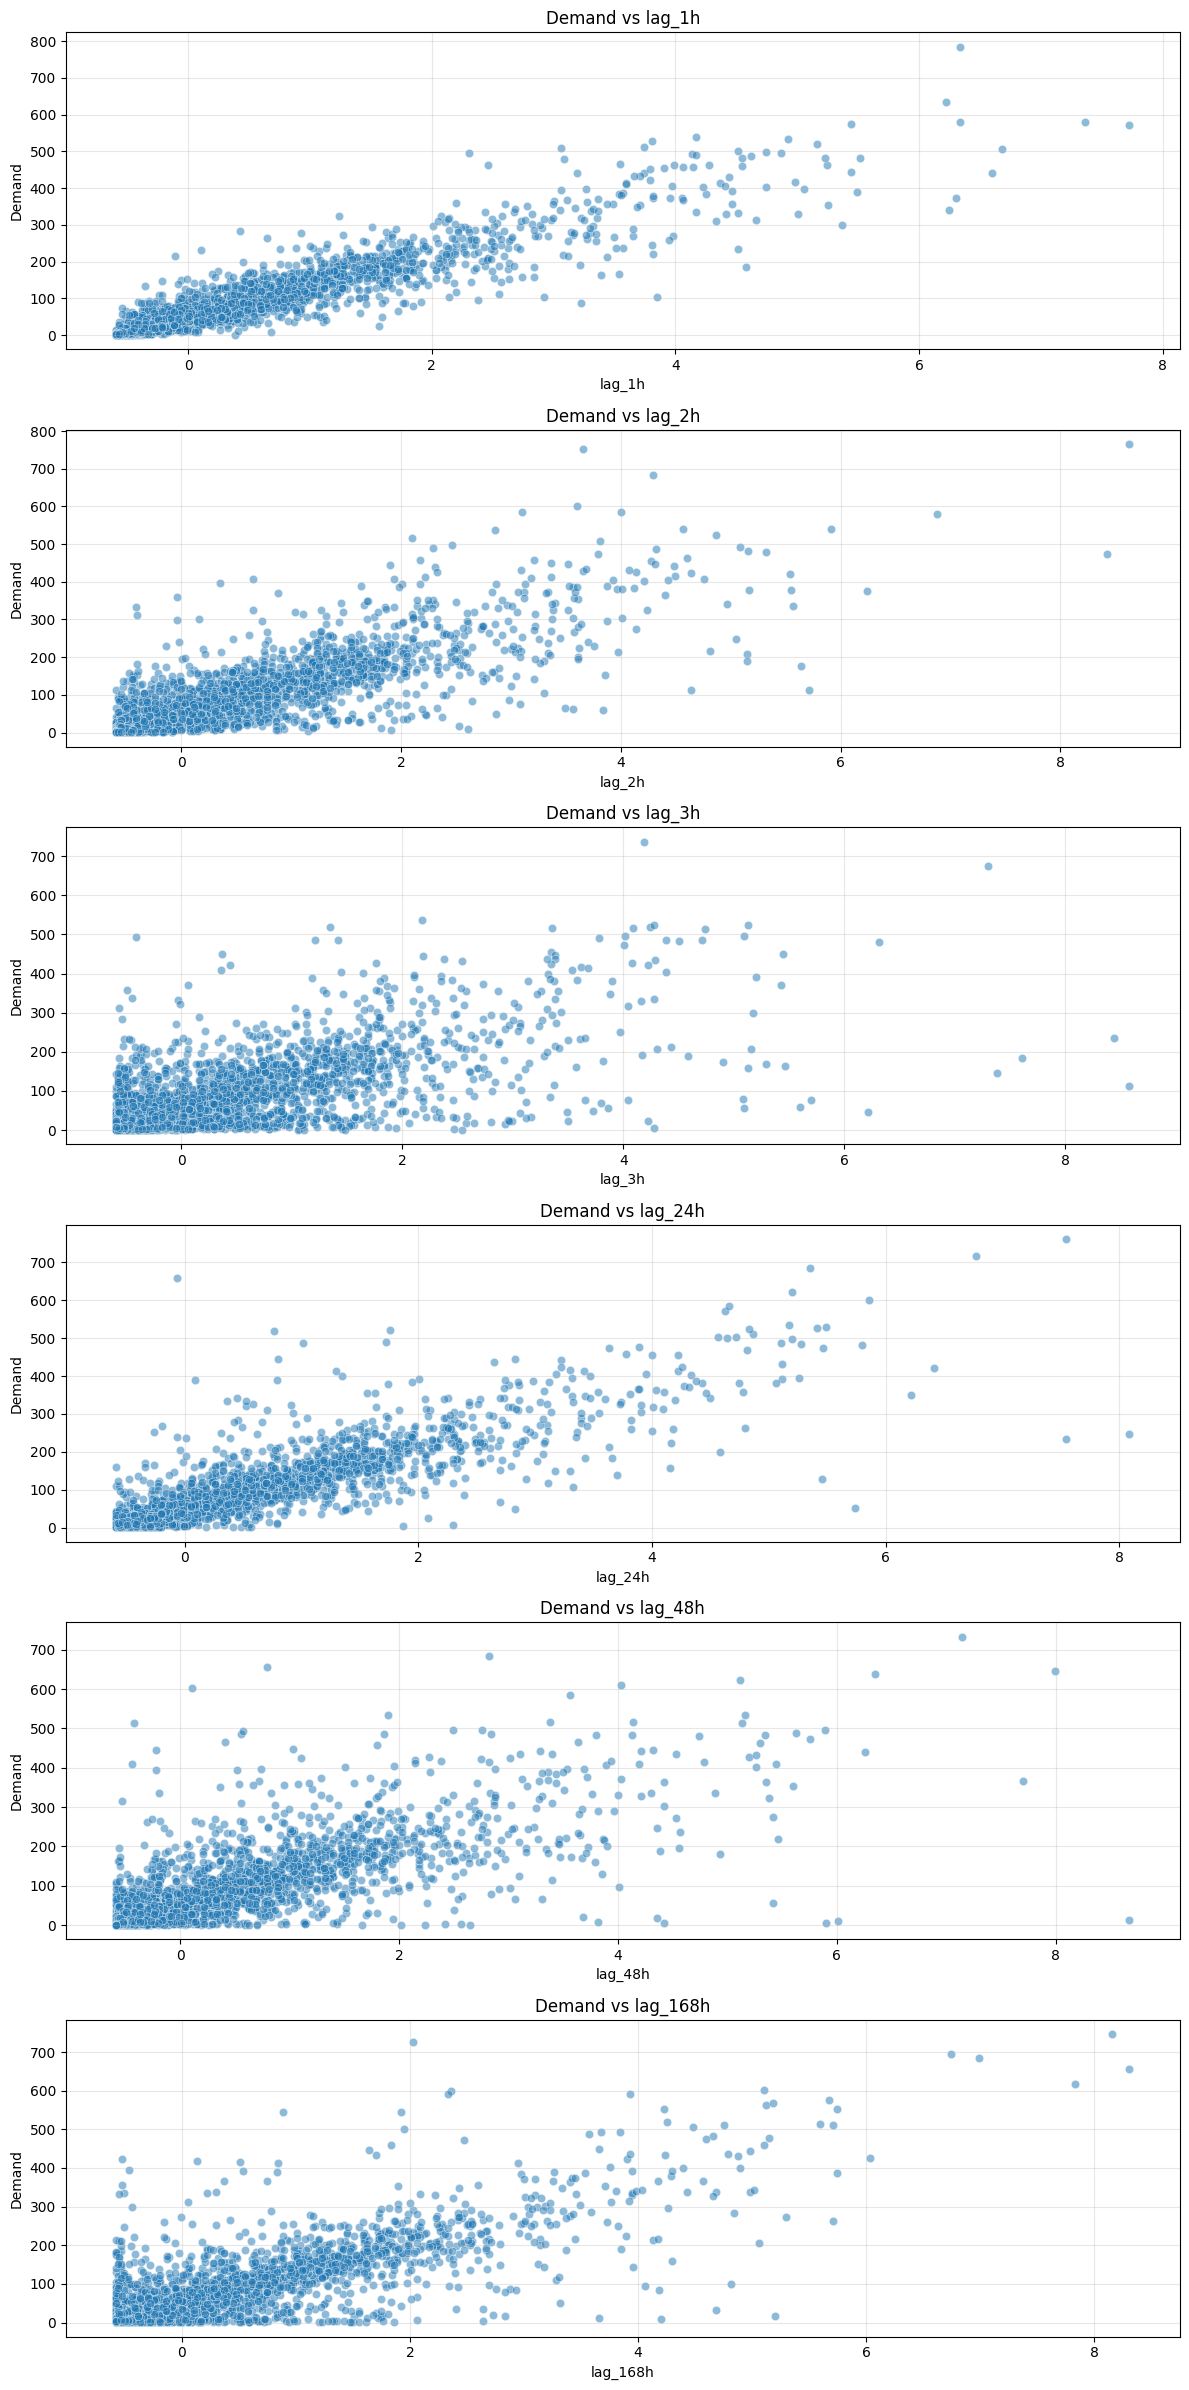

In [ ]:
lag_cols = [col for col in train_df.columns if 'lag_' in col]

if lag_cols:
    fig, axes = plt.subplots(len(lag_cols), 1, figsize=(12, 4*len(lag_cols)))

    for i, lag_col in enumerate(lag_cols):
        sns.scatterplot(x=lag_col, y='demand', data=train_df.sample(5000), alpha=0.5, ax=axes[i])
        axes[i].set_title(f'Demand vs {lag_col}', fontsize=12)
        axes[i].set_xlabel(lag_col, fontsize=10)
        axes[i].set_ylabel('Demand', fontsize=10)
        axes[i].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

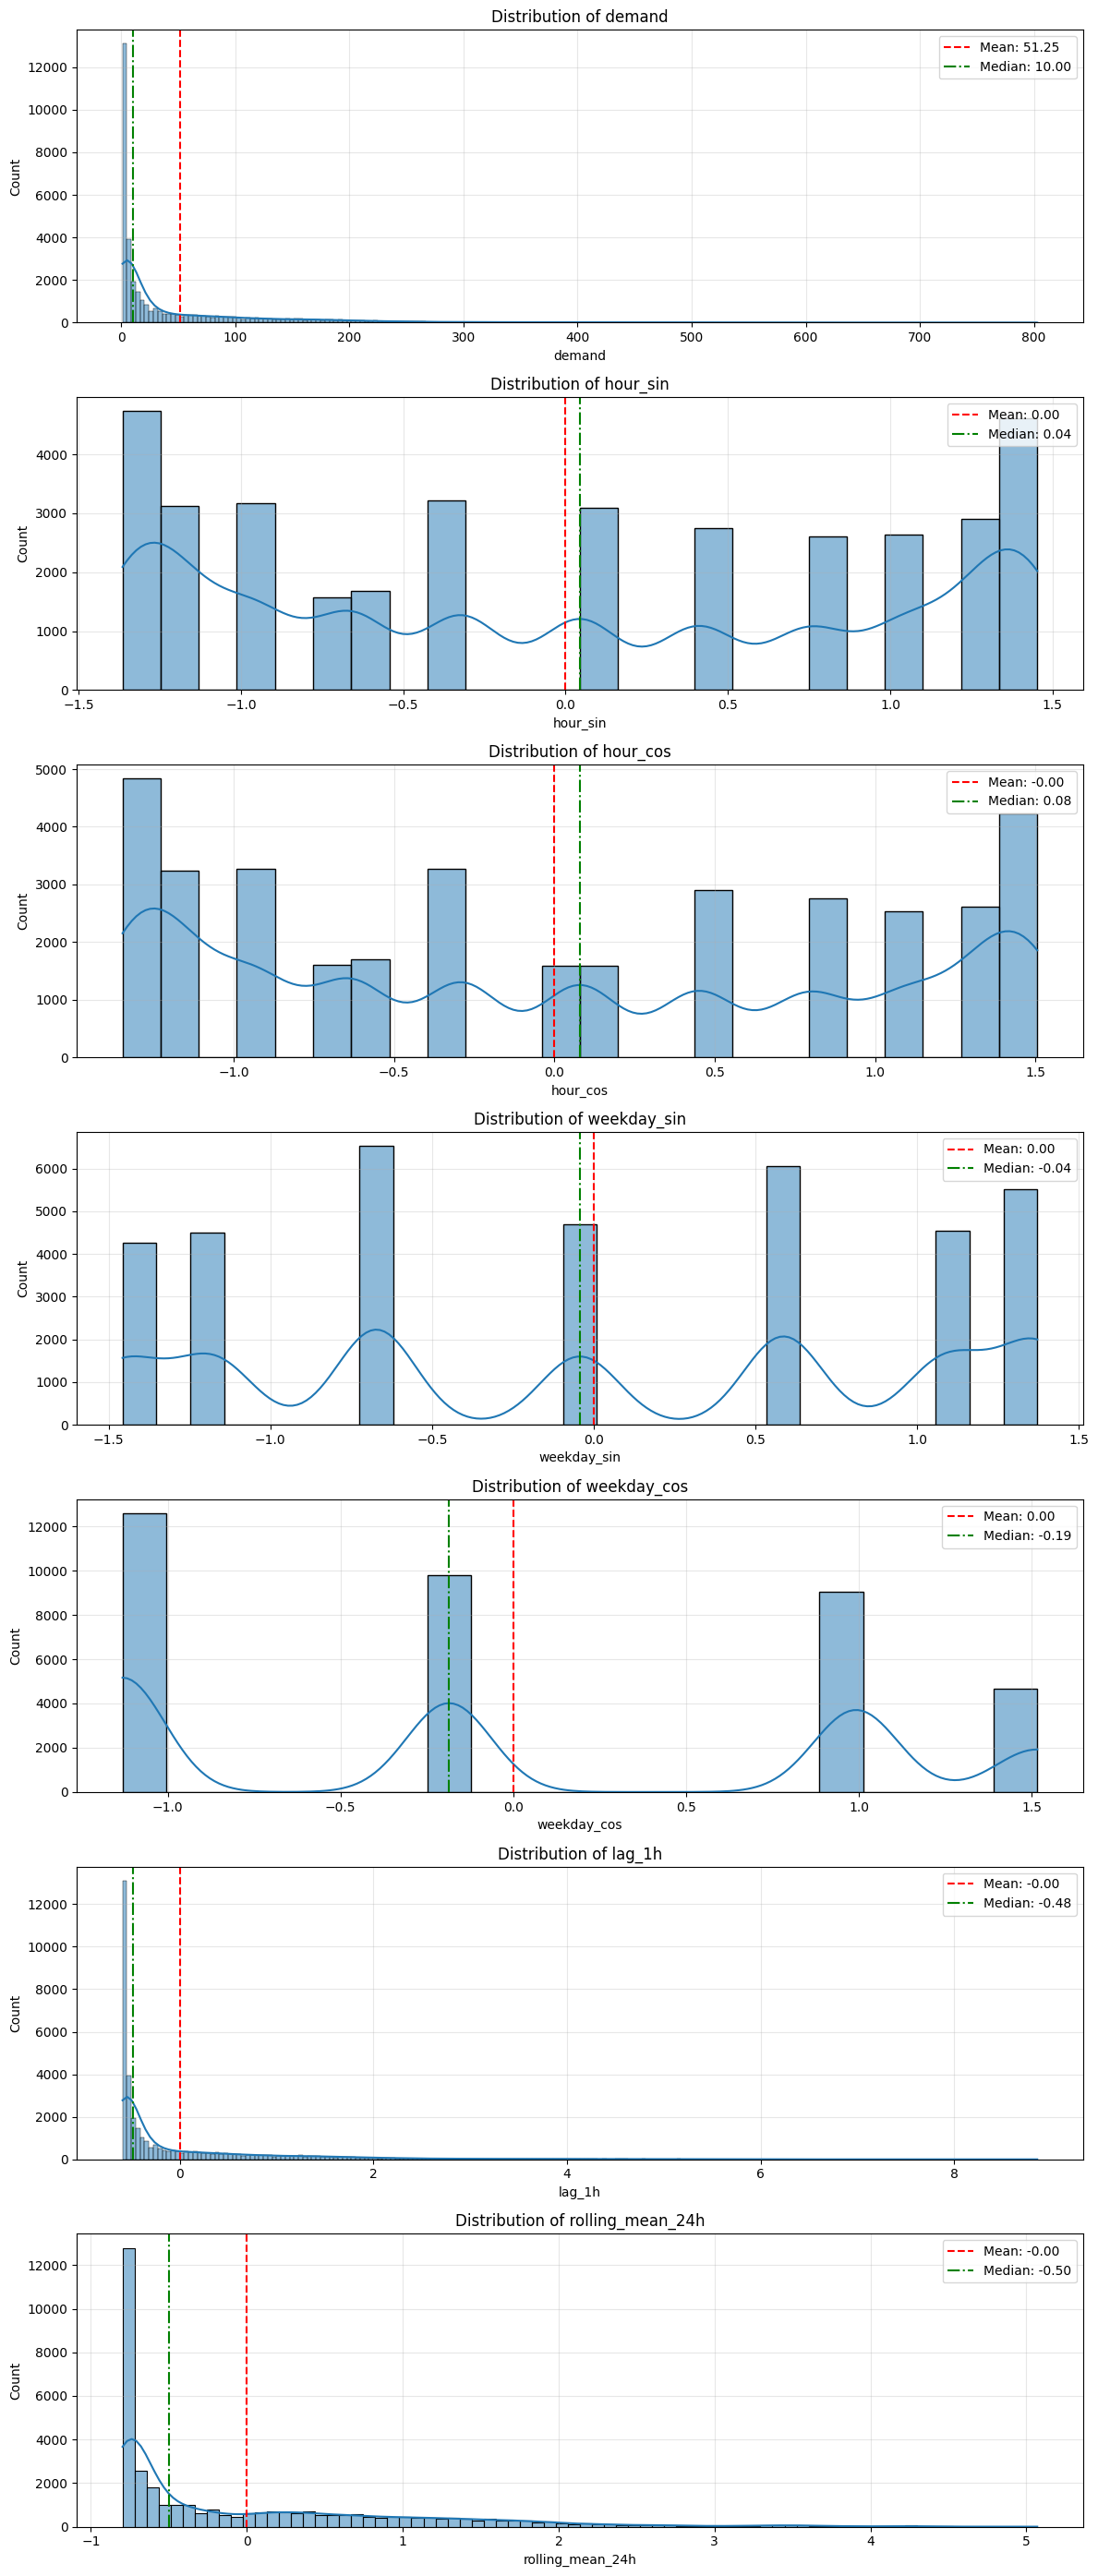

In [ ]:
key_features = ['demand', 'hour_sin', 'hour_cos', 'weekday_sin', 'weekday_cos']
if 'lag_1h' in train_df.columns:
    key_features.append('lag_1h')
if 'rolling_mean_24h' in train_df.columns:
    key_features.append('rolling_mean_24h')

fig, axes = plt.subplots(len(key_features), 1, figsize=(12, 4*len(key_features)))

for i, feature in enumerate(key_features):
    sns.histplot(train_df[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}', fontsize=12)
    axes[i].grid(True, alpha=0.3)

    mean_val = train_df[feature].mean()
    median_val = train_df[feature].median()
    axes[i].axvline(mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
    axes[i].axvline(median_val, color='g', linestyle='-.', label=f'Median: {median_val:.2f}')
    axes[i].legend()

plt.tight_layout()
plt.show()

In [ ]:
# Identify numerical columns to scale (exclude datetime and categorical)
numerical_cols = [col for col in train_df.columns if
                 train_df[col].dtype in ['int64', 'float64'] and
                 col not in ['PULocationID', 'demand']]

In [ ]:
scaler = StandardScaler()
train_df[numerical_cols] = scaler.fit_transform(train_df[numerical_cols])
test_df[numerical_cols] = scaler.transform(test_df[numerical_cols])

<ipython-input-79-9eed5a2a094e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[numerical_cols] = scaler.fit_transform(train_df[numerical_cols])
<ipython-input-79-9eed5a2a094e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[numerical_cols] = scaler.transform(test_df[numerical_cols])


In [ ]:
joblib.dump(scaler, 'demand_scaler.pkl')

['demand_scaler.pkl']

In [ ]:
# For feeding our Sequence model let's create sequences of our data

def create_sequences(data, features, target, seq_length=24):
    X, y = [], []

    for location in data['PULocationID'].unique():
        loc_data = data[data['PULocationID'] == location].sort_values('pickup_hour_rounded')

        if len(loc_data) >= seq_length + 1:
            loc_X = loc_data[features].values
            loc_y = loc_data[target].values

            for i in range(len(loc_data) - seq_length):
                X.append(loc_X[i:i+seq_length])
                y.append(loc_y[i+seq_length])

    return np.array(X), np.array(y)

feature_cols = [col for col in train_df.columns if col not in ['pickup_hour_rounded', 'demand']]

X_train, y_train = create_sequences(
    train_df,
    features=feature_cols,
    target='demand',
    seq_length=24
)

X_test, y_test = create_sequences(
    test_df,
    features=feature_cols,
    target='demand',
    seq_length=24
)

print(f"Training sequences shape: {X_train.shape}")
print(f"Testing sequences shape: {X_test.shape}")


Training sequences shape: (32455, 24, 24)
Testing sequences shape: (15215, 24, 24)


In [ ]:
X_train[:3]

array([[[ 4.        , -0.59051717, -0.57828597, ..., -1.34612571,
          0.58646839, -1.13074958],
        [ 4.        , -0.53161426, -0.59008752, ..., -1.1551192 ,
          0.58646839, -1.13074958],
        [ 4.        , -0.59051717, -0.53107975, ..., -0.92855019,
          0.58646839, -1.13074958],
        ...,
        [ 4.        , -0.55517542, -0.5192782 , ..., -1.29754643,
         -0.67208974, -1.13074958],
        [ 4.        , -0.59051717, -0.55468286, ..., -1.34612571,
         -0.67208974, -1.13074958],
        [ 4.        , -0.566956  , -0.59008752, ..., -1.29754643,
         -0.67208974, -1.13074958]],

       [[ 4.        , -0.53161426, -0.59008752, ..., -1.1551192 ,
          0.58646839, -1.13074958],
        [ 4.        , -0.59051717, -0.53107975, ..., -0.92855019,
          0.58646839, -1.13074958],
        [ 4.        , -0.55517542, -0.59008752, ..., -0.63327972,
          0.58646839, -1.13074958],
        ...,
        [ 4.        , -0.59051717, -0.55468286, ..., -

In [ ]:
X_test[:3]

array([[[ 4.        ,  0.32836816,  0.05899797, ...,  1.45667897,
         -1.4567879 , -0.18611988],
        [ 4.        ,  0.56397978,  0.33043372, ...,  1.31425174,
         -1.4567879 , -0.18611988],
        [ 4.        ,  0.38727106,  0.5664648 , ...,  1.08768273,
         -1.4567879 , -0.18611988],
        ...,
        [ 4.        ,  0.28124584, -0.28324711, ...,  1.50525824,
         -1.17673237,  0.99181408],
        [ 4.        ,  0.62288269,  0.2832275 , ...,  1.45667897,
         -1.17673237,  0.99181408],
        [ 4.        ,  0.87027489,  0.62547258, ...,  1.31425174,
         -1.17673237,  0.99181408]],

       [[ 4.        ,  0.56397978,  0.33043372, ...,  1.31425174,
         -1.4567879 , -0.18611988],
        [ 4.        ,  0.38727106,  0.5664648 , ...,  1.08768273,
         -1.4567879 , -0.18611988],
        [ 4.        , -0.16641625,  0.38944149, ...,  0.79241226,
         -1.4567879 , -0.18611988],
        ...,
        [ 4.        ,  0.62288269,  0.2832275 , ...,  